## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.

## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df = pd.read_csv('measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков.**

Проверим, есть ли в выборке пустые и NULL значения. Убедимся, что их нет.

In [3]:
df.isnull().sum()# нет NULL значений

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [6]:
df.isin([' ']).sum()#нет пустых значений

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [7]:
df.info()# все значения цифровые float или int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


Посмотрим, есть ли выбросы в значениях показателей.  

In [36]:
print(round(df.describe(),2))

              u_q     coolant  stator_winding         u_d  stator_tooth  \
count  1330816.00  1330816.00      1330816.00  1330816.00    1330816.00   
mean        54.28       36.23           66.34      -25.13         56.88   
std         44.17       21.79           28.67       63.09         22.95   
min        -25.29       10.62           18.59     -131.53         18.13   
25%         12.07       18.70           42.79      -78.69         38.42   
50%         48.94       26.90           65.11       -7.43         56.04   
75%         90.03       49.86           88.14        1.47         75.59   
max        133.04      101.60          141.36      131.47        111.95   

       motor_speed         i_d         i_q          pm  stator_yoke  \
count   1330816.00  1330816.00  1330816.00  1330816.00   1330816.00   
mean       2202.08      -68.72       37.41       58.51        48.19   
std        1859.66       64.93       92.18       19.00        19.99   
min        -275.55     -278.00     -293.

<AxesSubplot:xlabel='u_q'>

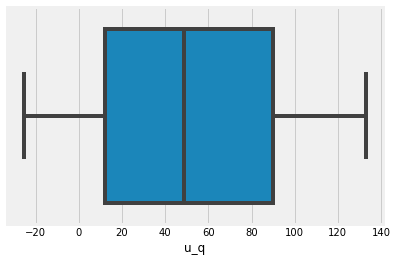

In [8]:
sns.boxplot(df['u_q'])#нет выбросов

<AxesSubplot:xlabel='coolant'>

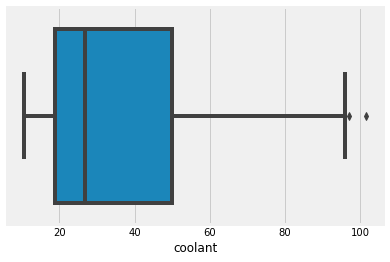

In [9]:
sns.boxplot(df['coolant'])#есть значения выше 97 это выбросы

In [11]:
df[df.coolant>97]

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
800832,82.125980,97.195642,79.215880,102.459011,77.554161,2900.070198,-83.625257,-117.057873,45.795328,78.707704,25.798566,-97.826560,59
800833,82.878907,101.598512,79.299686,102.004424,77.677316,2916.693487,-83.234455,-115.650747,45.921872,78.707409,25.796318,-96.660701,59


In [10]:
df_col = df[df['profile_id']==59]

<AxesSubplot:xlabel='coolant'>

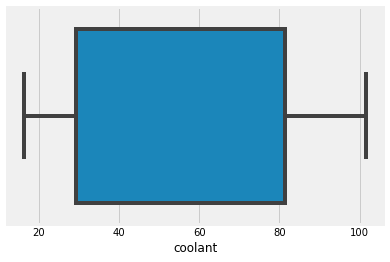

In [9]:
sns.boxplot(df_col['coolant'])

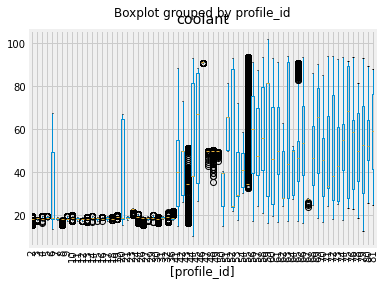

In [7]:
boxplot = df.boxplot(column=['coolant'], by = ['profile_id'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='stator_winding'>

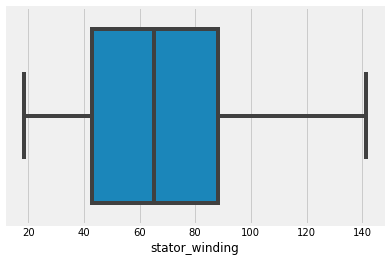

In [10]:
sns.boxplot(df['stator_winding'])# нет выбросов

<AxesSubplot:xlabel='u_d'>

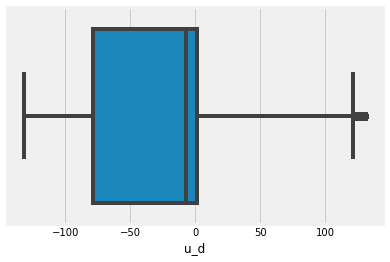

In [11]:
sns.boxplot(df['u_d'])# значения выше 124 - выбросы

<AxesSubplot:xlabel='stator_tooth'>

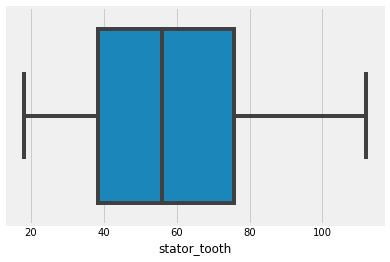

In [12]:
sns.boxplot(df['stator_tooth'])

<AxesSubplot:xlabel='motor_speed'>

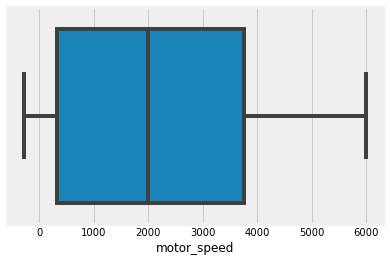

In [13]:
sns.boxplot(df['motor_speed'])

<AxesSubplot:xlabel='i_d'>

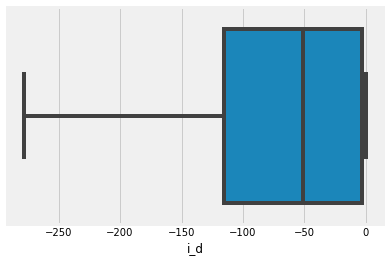

In [14]:
sns.boxplot(df['i_d'])

<AxesSubplot:xlabel='i_q'>

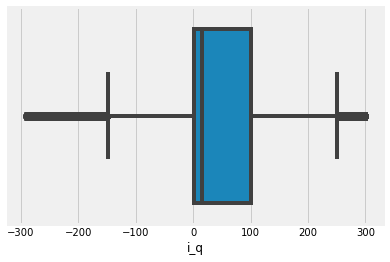

In [15]:
sns.boxplot(df['i_q'])# выбросы это значения меньше -150 и выше 250

<AxesSubplot:xlabel='pm'>

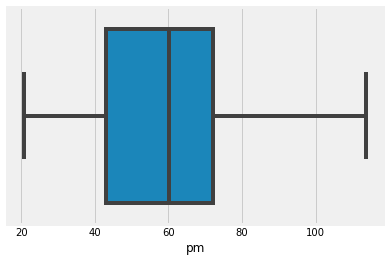

In [16]:
sns.boxplot(df['pm'])

<AxesSubplot:xlabel='stator_yoke'>

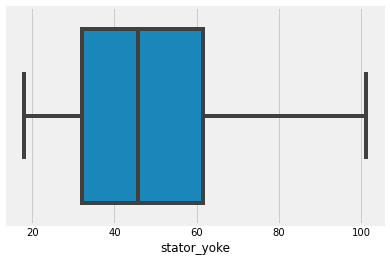

In [17]:
sns.boxplot(df['stator_yoke'])

<AxesSubplot:xlabel='ambient'>

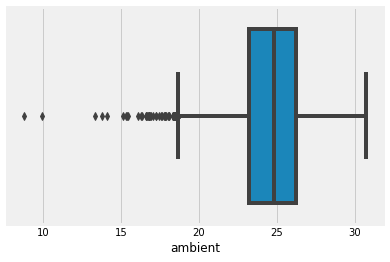

In [18]:
sns.boxplot(df['ambient'])#значения ниже 18 это выбросы

<AxesSubplot:xlabel='torque'>

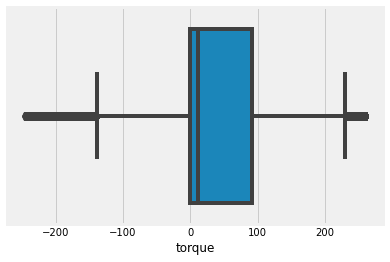

In [19]:
sns.boxplot(df['torque'])# есть выбросы

<AxesSubplot:xlabel='profile_id'>

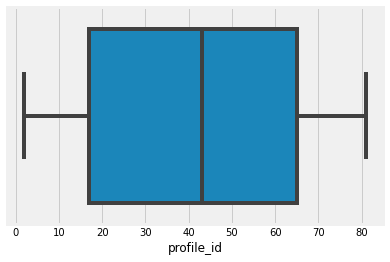

In [20]:
sns.boxplot(df['profile_id'])

Построим матрицу корреляций

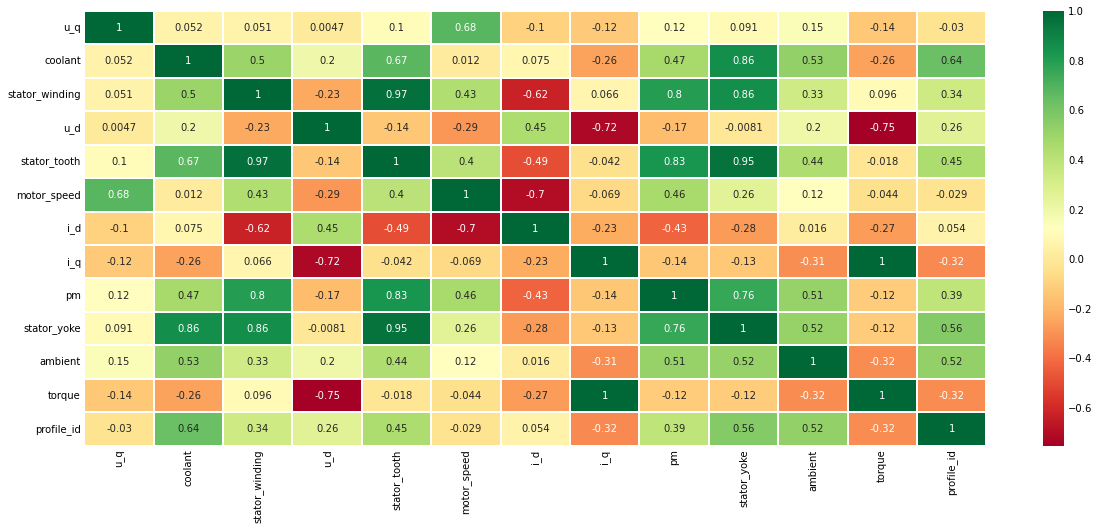

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

Видим, что имеет место мультиколлинеарность. Для пары torque и i_q корреляция=1; stator_tooth и stator_winding =0.97; stator_tooth и stator_yoke = 0.95

In [15]:
df.drop(['torque','profile_id','stator_tooth'],axis=1,inplace=True)#удаление признаков torque stator_tooth, profile_id - просто номер испытания

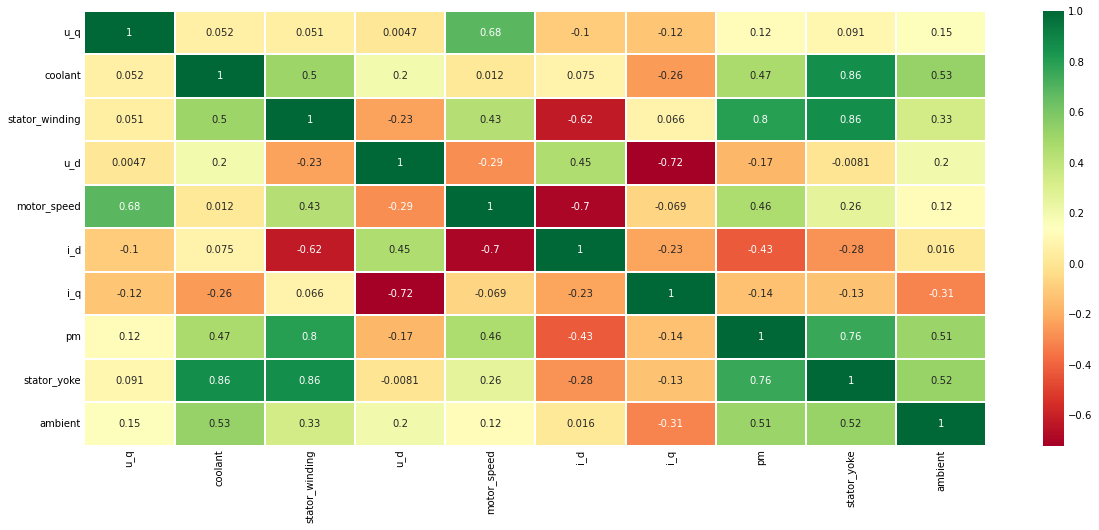

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

In [17]:
correlation = df.corr() #оценка коэффициентов корреляции для motor_speed
correlation['motor_speed'].sort_values(ascending = False)

motor_speed       1.000000
u_q               0.683556
pm                0.458947
stator_winding    0.432034
stator_yoke       0.255790
ambient           0.118232
coolant           0.011872
i_q              -0.068881
u_d              -0.288472
i_d              -0.700609
Name: motor_speed, dtype: float64

у motor_speed есть довольно сильные положительная корреляция с u_q и отрицательная корреляция с i_d

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [52]:
Xl = df.drop(['motor_speed'],axis=1)# деление на признаки и целевую переменную
yl = df['motor_speed']

In [53]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.2,random_state = 0)#деление на тест и трен выборки

In [54]:
cols = Xl_train.columns 

In [55]:
from sklearn.preprocessing import StandardScaler # масштабирование

scaler = StandardScaler()

Xl_train = scaler.fit_transform(Xl_train)

Xl_test = scaler.transform(Xl_test)

In [56]:
Xl_train = pd.DataFrame(Xl_train, columns=[cols])
Xl_test = pd.DataFrame(Xl_test, columns=[cols])

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #обучение линейной регрессии
lr.fit(Xl_train, yl_train)

LinearRegression()

In [58]:
yl_train_predicted = lr.predict(Xl_train)
yl_test_predicted = lr.predict(Xl_test)

In [59]:
mean_absolute_error(yl_train_predicted, yl_train), mean_absolute_error(yl_test_predicted, yl_test)

(359.5248104048447, 359.365058145896)

In [60]:
mean_squared_error(yl_train_predicted, yl_train), mean_squared_error(yl_test_predicted, yl_test)

(247117.34050215277, 247393.8568263383)

In [103]:
from sklearn.model_selection import cross_val_score

CV_MSE = cross_val_score(lr, Xl_train, yl_train, cv=5, scoring='neg_mean_squared_error')
CV_MAE = cross_val_score(lr, Xl_train, yl_train, cv=5, scoring='neg_mean_absolute_error')

In [104]:
CV_MSE

array([-247942.39722403, -244988.41010162, -246510.47123719,
       -247895.74760277, -248276.93238828])

Text(0, 0.5, 'Value of MSE')

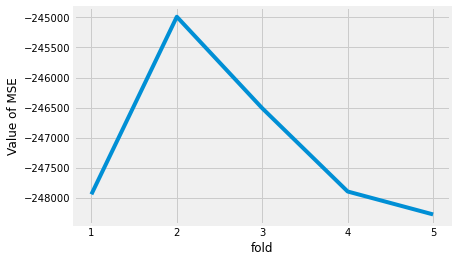

In [105]:
x_lab = ['1','2','3','4','5']
plt.plot(x_lab,CV_MSE)
plt.xlabel('fold')
plt.ylabel('Value of MSE')

In [106]:
CV_MAE

array([-359.72670215, -358.66504112, -359.01670693, -359.95484188,
       -360.27788426])

Text(0, 0.5, 'Value of MAE')

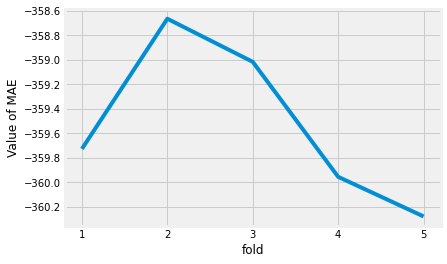

In [107]:
x_lab = ['1','2','3','4','5']
plt.plot(x_lab,CV_MAE)
plt.xlabel('fold')
plt.ylabel('Value of MAE')

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

Отделим целевую переменную от признаков и разделим выборку на обучающую и тестовую:

In [18]:
X = df.drop(['motor_speed'],axis=1)
y = df['motor_speed']

In [19]:
y.value_counts()

4999.945801    1693
4999.946289    1675
4999.947266    1626
4999.945312    1609
4999.947754    1576
               ... 
5623.887572       1
5622.546619       1
5627.218863       1
5634.806463       1
0.004395          1
Name: motor_speed, Length: 777565, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.shape, X_test.shape

((1064652, 9), (266164, 9))

Масштабируем(стандартизируем) признаки:

In [22]:
cols = X_train.columns

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [24]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [25]:
X_train.head()

,u_q,coolant,stator_winding,u_d,i_d,i_q,pm,stator_yoke,ambient
0,1.741543,-0.822206,-1.336720,0.386236,1.027752,-0.394592,-1.109132,-1.130576,-0.144478
1,-0.476419,-0.098413,2.038952,-0.932058,-0.917553,2.308768,0.753418,1.063924,1.043696
2,1.348495,0.580776,0.357915,1.431715,-0.093816,-0.981975,0.584889,0.538530,0.175414
3,-1.241025,-0.583558,-1.339348,0.449582,1.027641,-0.394304,-0.281970,-1.113078,0.912814
4,0.473076,-0.619781,-0.012894,0.151938,0.986186,-0.124989,0.737412,-0.109727,0.931280


In [26]:
from sklearn.neighbors import KNeighborsRegressor ##обучение модели

knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [27]:
y_pred = knn.predict(X_test)

#y_pred

In [28]:
from sklearn.metrics import mean_absolute_error #neg_mean_absolute_error
mean_absolute_error(y_test, y_pred)

12.397481617963688

In [29]:
from sklearn.metrics import mean_squared_error #neg_mean_squared_error
mean_squared_error(y_test, y_pred)

1788.2770825834743

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,5)
cv_score={}
cv_score_list=[]
for k in k_range: 
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    cv_score[k]=cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')#.mean()
    cv_score_list.append(cv_score[k])
cv_score_list        

[array([-16.41657841, -16.40974063, -16.72227546, -16.39602053,
        -16.58772805]),
 array([-14.3502223 , -14.38599998, -14.49322608, -14.33754542,
        -14.52016935]),
 array([-15.90125426, -15.82573942, -16.11948568, -15.87563963,
        -16.08207776]),
 array([-17.10828252, -16.96323766, -17.23907621, -17.09871265,
        -17.2490011 ])]

In [31]:
k_range = range(1,5)
cv_score_nmae={}
cv_score_list_nmae=[]
cv_score_nmse={}
cv_score_list_nmse=[]
for k in k_range: 
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    cv_score_nmae[k]=cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
    cv_score_list_nmae.append(cv_score_nmae[k])
    cv_score_nmse[k]=cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_score_list_nmse.append(cv_score_nmse[k])


In [32]:
cv_score_list_nmae

[-16.506468617422502,
 -14.417432624022098,
 -15.960839350039,
 -17.131662027098997]

In [33]:
cv_score_list_nmse

[-2574.806298977275,
 -2186.9251967315913,
 -2332.2404520455043,
 -2542.7267014850686]

Text(0, 0.5, 'Value of MAE')

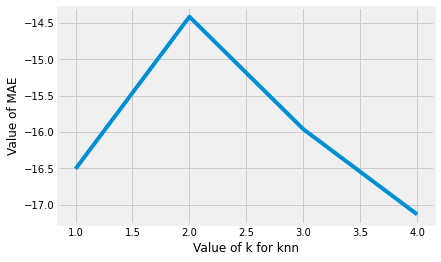

In [34]:
plt.plot(k_range,cv_score_list_nmae)
plt.xlabel('Value of k for knn')
plt.ylabel('Value of MAE')

Text(0, 0.5, 'Value of MSE')

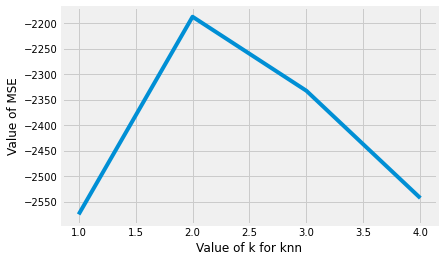

In [35]:
plt.plot(k_range,cv_score_list_nmse)
plt.xlabel('Value of k for knn')
plt.ylabel('Value of MSE')

Самые лучшие показатели у модели при k=2

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из суммы токов)
- Нормализация вектора напряжения. (корень квадратный из суммы напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [83]:
df['NVC']=df[['i_d','i_q']].sum(axis=1)**0.5
df

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,i_q,pm,stator_yoke,ambient,NVC,NVV,FP,EP
0,-0.450682,18.805172,19.086670,-0.350055,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.068900,NaN,NaN,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,NaN,NaN,NaN,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.040940,NaN,NaN,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.045511,NaN,NaN,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,NaN,NaN,NaN,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,NaN,NaN,NaN,-3.945756
1330812,-2.258684,30.721306,45.239017,0.778900,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,NaN,NaN,NaN,-4.037250
1330813,-2.130312,30.721312,45.211576,0.804914,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,NaN,NaN,NaN,-3.949953
1330814,-2.268498,30.721316,45.193508,0.763091,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,NaN,NaN,NaN,-4.012529


Очень вероятно, что я делаю не то, что нужно и получаю NaN(((((  
Но если я права и он тут по праву, то у меня следующий вопрос: когда его заменять, по хорошему надо брать медиану на трен выборке и распространять на тестовую(если не напутала), но до этого ещё далеко и если я сейчас не заменю, то получу почти весть столбец с Nan в FP.

In [84]:
# замена нан в NVC
df['NVC'] = df.NVC.fillna(df.NVC.median())
df

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,i_q,pm,stator_yoke,ambient,NVC,NVV,FP,EP
0,-0.450682,18.805172,19.086670,-0.350055,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.068900,NaN,NaN,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,9.439503,NaN,NaN,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.040940,NaN,NaN,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.045511,NaN,NaN,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,9.439503,NaN,NaN,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,9.439503,NaN,NaN,-3.945756
1330812,-2.258684,30.721306,45.239017,0.778900,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,9.439503,NaN,NaN,-4.037250
1330813,-2.130312,30.721312,45.211576,0.804914,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,9.439503,NaN,NaN,-3.949953
1330814,-2.268498,30.721316,45.193508,0.763091,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,9.439503,NaN,NaN,-4.012529


In [85]:
df['NVV']=df[['u_d','u_q']].sum(axis=1)**0.5
df

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,i_q,pm,stator_yoke,ambient,NVC,NVV,FP,EP
0,-0.450682,18.805172,19.086670,-0.350055,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.068900,NaN,NaN,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,9.439503,NaN,NaN,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.040940,NaN,NaN,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.045511,NaN,NaN,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,9.439503,NaN,NaN,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,9.439503,NaN,NaN,-3.945756
1330812,-2.258684,30.721306,45.239017,0.778900,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,9.439503,NaN,NaN,-4.037250
1330813,-2.130312,30.721312,45.211576,0.804914,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,9.439503,NaN,NaN,-3.949953
1330814,-2.268498,30.721316,45.193508,0.763091,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,9.439503,NaN,NaN,-4.012529


In [86]:
# замена нан в NVV
df['NVV'] = df.NVV.fillna(df.NVV.median())
df

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,i_q,pm,stator_yoke,ambient,NVC,NVV,FP,EP
0,-0.450682,18.805172,19.086670,-0.350055,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.068900,6.932055,NaN,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,9.439503,6.932055,NaN,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.040940,6.932055,NaN,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.045511,6.932055,NaN,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,9.439503,6.932055,NaN,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,9.439503,6.932055,NaN,-3.945756
1330812,-2.258684,30.721306,45.239017,0.778900,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,9.439503,6.932055,NaN,-4.037250
1330813,-2.130312,30.721312,45.211576,0.804914,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,9.439503,6.932055,NaN,-3.949953
1330814,-2.268498,30.721316,45.193508,0.763091,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,9.439503,6.932055,NaN,-4.012529


In [87]:
df['FP']=df['NVC']*df['NVV']
df['EP']=(df['i_d']*df['u_d'])+(df['i_q']*df['u_q'])

In [81]:
df.isnull().sum()#это было до замены

u_q                     0
coolant                 0
stator_winding          0
u_d                     0
motor_speed             0
i_d                     0
i_q                     0
pm                      0
stator_yoke             0
ambient                 0
NVC                938622
NVV                466462
FP                1110150
EP                      0
dtype: int64

In [88]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
NVC               0
NVV               0
FP                0
EP                0
dtype: int64

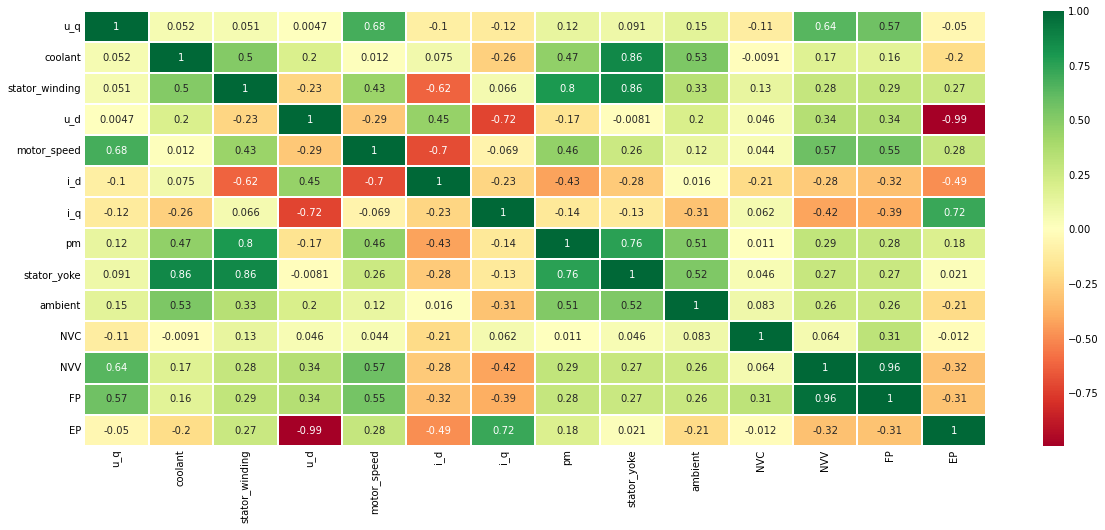

In [89]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

In [90]:
df.drop(['u_d'],axis=1,inplace=True)

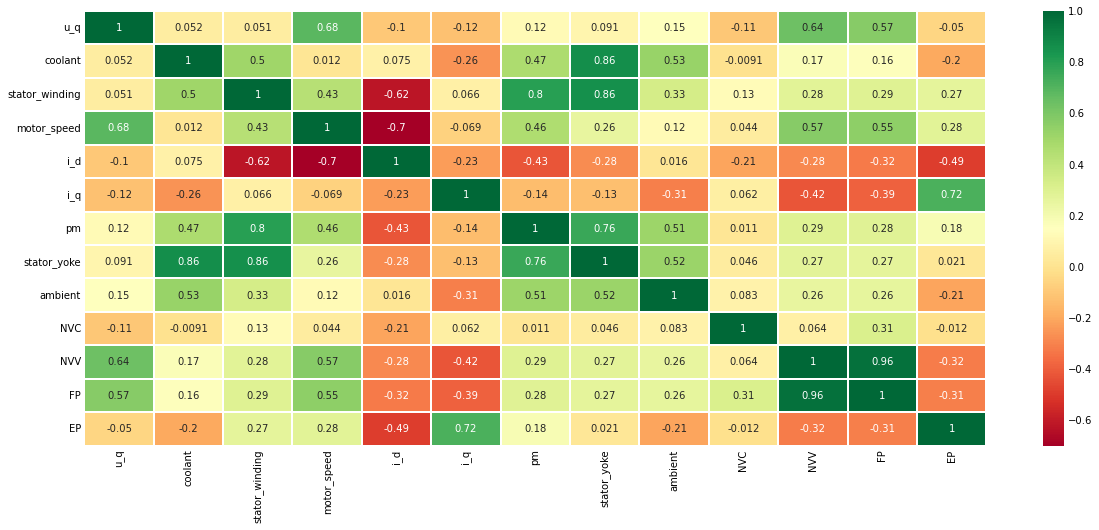

In [91]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**

In [92]:
Xl_1 = df.drop(['motor_speed'],axis=1)# деление на признаки и целевую переменную
yl_1 = df['motor_speed']

In [93]:
Xl_1_train, Xl_1_test, yl_1_train, yl_1_test = train_test_split(Xl_1, yl_1, test_size=0.2,random_state = 0)#деление на тест и трен выборки

In [94]:
cols = Xl_1_train.columns 

In [95]:
from sklearn.preprocessing import StandardScaler # масштабирование

scaler = StandardScaler()

Xl_1_train = scaler.fit_transform(Xl_1_train)

Xl_1_test = scaler.transform(Xl_1_test)

In [96]:
Xl_1_train = pd.DataFrame(Xl_1_train, columns=[cols])
Xl_1_test = pd.DataFrame(Xl_1_test, columns=[cols])

In [97]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression() #обучение линейной регрессии
lr1.fit(Xl_1_train, yl_1_train)

LinearRegression()

In [99]:
yl_1_train_predicted = lr1.predict(Xl_1_train)
yl_1_test_predicted = lr1.predict(Xl_1_test)

In [100]:
mean_absolute_error(yl_1_train_predicted, yl_1_train), mean_absolute_error(yl_1_test_predicted, yl_1_test)

(353.3774230993607, 353.2613713511631)

In [101]:
mean_squared_error(yl_1_train_predicted, yl_1_train), mean_squared_error(yl_1_test_predicted, yl_1_test)

(243215.16243068548, 243539.2040607312)

In [102]:
from sklearn.model_selection import cross_val_score

CV_MSE1 = cross_val_score(lr1, Xl_1_train, yl_1_train, cv=5, scoring='neg_mean_squared_error')
CV_MAE1 = cross_val_score(lr1, Xl_1_train, yl_1_train, cv=5, scoring='neg_mean_absolute_error')

Text(0, 0.5, 'Value of MSE')

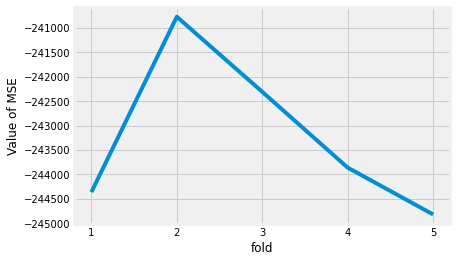

In [108]:
x_lab = ['1','2','3','4','5']
plt.plot(x_lab,CV_MSE1)
plt.xlabel('fold')
plt.ylabel('Value of MSE')

Text(0, 0.5, 'Value of MAE')

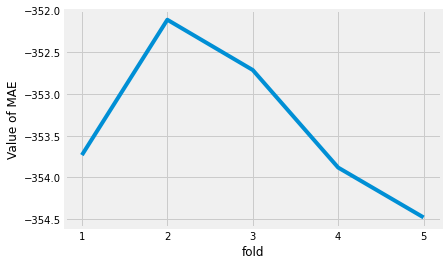

In [109]:
x_lab = ['1','2','3','4','5']
plt.plot(x_lab,CV_MAE1)
plt.xlabel('fold')
plt.ylabel('Value of MAE')

## Knn

In [110]:
Xn = df.drop(['motor_speed'],axis=1)
yn = df['motor_speed']

In [111]:
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.2, random_state = 0)

In [112]:
cols = Xn_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xn_train = scaler.fit_transform(Xn_train)

Xn_test = scaler.transform(Xn_test)

Xn_train = pd.DataFrame(Xn_train, columns=[cols])
Xn_test = pd.DataFrame(Xn_test, columns=[cols])

In [113]:
from sklearn.neighbors import KNeighborsRegressor ##обучение модели

knn_n = KNeighborsRegressor(n_neighbors=2)

knn_n.fit(Xn_train, yn_train)

KNeighborsRegressor(n_neighbors=2)

In [114]:
yn_pred = knn_n.predict(Xn_test)

In [115]:
from sklearn.metrics import mean_absolute_error #neg_mean_absolute_error
mean_absolute_error(yn_test, yn_pred)

14.262632223463921

In [116]:
from sklearn.metrics import mean_squared_error #neg_mean_squared_error
mean_squared_error(yn_test, yn_pred)

2405.204018595353

In [117]:
kn_range = range(1,5)
cv_score_nmae_n={}
cv_score_list_nmae_n=[]
cv_score_nmse_n={}
cv_score_list_nmse_n=[]
for k in kn_range: 
    knn_n = KNeighborsRegressor(n_neighbors= k)
    knn_n.fit(Xn_train,yn_train)
    yn_pred=knn_n.predict(Xn_test)
    cv_score_nmae_n[k]=cross_val_score(knn_n, Xn_train, yn_train, cv=5, scoring='neg_mean_absolute_error').mean()
    cv_score_list_nmae_n.append(cv_score_nmae_n[k])
    cv_score_nmse_n[k]=cross_val_score(knn_n, Xn_train, yn_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_score_list_nmse_n.append(cv_score_nmse_n[k])

In [118]:
cv_score_list_nmae_n

[-17.8907963885503,
 -16.201963036437576,
 -17.536199124584932,
 -18.654584587842113]

In [119]:
cv_score_list_nmse_n

[-3242.7079961691084,
 -2825.928162813526,
 -2951.4800231144027,
 -3174.3714807808956]

Text(0, 0.5, 'Value of MAE')

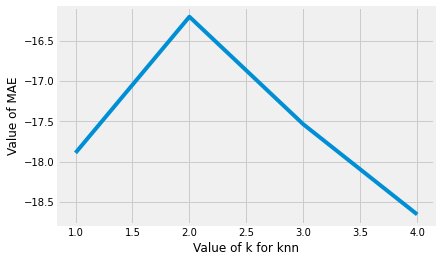

In [120]:
plt.plot(kn_range,cv_score_list_nmae_n)
plt.xlabel('Value of k for knn')
plt.ylabel('Value of MAE')

Text(0, 0.5, 'Value of MSE')

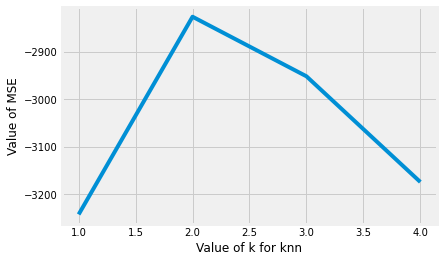

In [121]:
plt.plot(kn_range,cv_score_list_nmse_n)
plt.xlabel('Value of k for knn')
plt.ylabel('Value of MSE')

Показатели MAE и MSE стали хуже. Добавление новых признаков не улучшило модель, либо при добавлении были допущены существенные ошибки (скорее всего). Также я так и не разобралась с выбросами. 
Знаю, всё плохо.